# Tarea 2

In [6]:
import numpy as np

# Caos: Primera parte

## Introducción

### Mapeos

A los sistemas dinámicos discretos, en una dimensión se les conoce como **mapas**, ya que son funciones

$$
f: \mathrm{R} \to \mathrm{R}
$$

y los cuales producen la _secuencia_ de puntos:

$$
\{x, f(x), f^2(x), f^3(x), \ldots\}
$$

la cual se conoce como _órbita_ de $x$ bajo $f$.

Los sistemas dinámicos discretos, se pueden pensar como ecuaciones de diferencias de primer orden

$$
y = x_{n+1} = f(x_n)
$$

y regularmente 

$$
y=f(x) = f(x, a)
$$

existe un parámetro $a$ que puede influir muchísimo en el comportamiento del sistema.

### Comportamientos

Pueden pasar lo siguiente:

- Si $f(x) = x$ hemos alcanzado un _punto fijo_.

- Si $f^n(x) = x$, pero $f^k(x) \neq x$ para $k \leq n$, se dice que la órbita tiene _periodo_ de orden $n$.

### Mapeo logístico

$$
x_{n+1} = rx_n(1 -x_n)
$$

Donde, para fines de esta clase, $r$ esta contenido en 

$$
0 \leq r \leq 4
$$

la razón de esto, es que el cuadro unitario mapea al cuadro unitario, i.e.

$$ 
0 \leq x \leq 1 \to 0 \leq f(x) \leq 1
$$

<div class="alert alert-info">
    
**Ejercicio** ¿Por qué?
</div>

Como 0<= r <= 4 y como 0<=x<=1 => 0<= rx(1-x)=<4 y por transitividad 0<= f(x) <= 1

<div class="alert alert-info">
    
**Ejercicio**  Define la función `logistic_map` que recibe como parámetros $x$ y $r$ regresa $rx(1−x)$. 
</div>

In [7]:
def logistic_map(x,r):
    return r*x*(1-x)

Los _puntos fijos_ del mapeo logístico son:

$$
x = f(x)
$$

$$
x = rx(1-x)
$$

$$
1 = r(1-x)
$$

$$
x = 1 - \frac{1}{r}
$$

El punto fijo se dice _estable_ si $|f(x) - x_0| < |x - x_0|$ e _inestable_ si la desigualdad se invierte.

<div class="alert alert-info">
    
**Ejercicio** Calcule el punto fijo para $r = 2$ usando SymPy
</div>

In [8]:
from sympy import *
x = Symbol("x")
r = Symbol("r")
fijo = Eq(x, 1-1/r)
fijo.rhs.subs(r,2)

1/2

In [9]:
solve(Eq(x, 2*x*(1-x)))

[0, 1/2]

<div class="alert alert-warning">

**Teorema:**

Sea $f(x_0) = x_0.$, entonces, 

<ul>
<li>Si $f'(x)$ es contínua y $|f'(x_0)| < 1$ entonces $x_0$ es estable.</li>


<li>Si $f'(x)$ es contínua y $|f'(x_0)| > 1$ entonces $x_0$ es inestable.</li>
</ul>
</div>

<div class="alert alert-info">
    
**Ejercicio** ¿Cuáles son las condiciones de estabilidad para el parámetro $r$? Los valores de $r$ para cuales cambia de estable a inestable y viceversa, se llaman _puntos de bifurcación_.
</div>

In [10]:
Eq(Derivative(r*x*(1-x),x).doit().subs(x,fijo.rhs),1).simplify()

Eq(r, 1)

In [11]:
Eq(Derivative(r*x*(1-x),x).doit().subs(x,fijo.rhs),-1).simplify()

Eq(r, 3)

In [12]:
simplify(Eq(abs(diff(r*x*(1- x), x)).subs(x, 1 - 1/r),1))

Eq(Abs(r - 2), 1)

<div class="alert alert-info">
    
**Ejercicio** Define una función `iterar` que reciba una función `g`, un punto inicial `x0`, un entero `N` y el parámetro `r` regrese $g(g( \ldots(g(x_0, r),r) \ldots)$. En otras palabras que itere `g`, `N` veces a partir del punto `x0`.
</div>

In [13]:
def iterar(g, x, n, r):
    if n == 1: 
        calculo = g(x,r)
    else: 
        calculo = g(iterar(g, x, n-1, r), r)
    return calculo

<div class="alert alert-info">
    
**Ejercicio** Define una función `iterarLista` que reciba una función `g`, un punto inicial `x0`, un entero `N` y el parámetro $r$ regrese la lista $[x_0, g(x), g(g(x)), \ldots g(g(\ldots(g(x))\ldots))]$ En otras palabras que itere `g`, `N-1` veces a partir del punto `x0` y devuelva la órbita completa empezando desde `x0`.
</div>

In [14]:
def iterarLista(g, x, n, r):
    y = [x]
    for i in range(n):
        y.append(iterar(g,x, i+1, r))
    print(y)
    return y

<div class="alert alert-info">
    
**Ejercicio** Usa las funciones recién definidas para calcular iteraciones para $r = \{ 0.8, 1.2, 2.8, 3.2\}$,
</div>

In [15]:
𝑟=[0.8,1.2,2.8,3.2]
for i in r:
    iterarLista(logistic_map, .1, 20, i)

[0.1, 0.07200000000000002, 0.053452800000000016, 0.04047647853772801, 0.031070506578330284, 0.024084104159436976, 0.018803248069019493, 0.014759748744859528, 0.011633518849478518, 0.009198544070925876, 0.007291144686320888, 0.005790387116387219, 0.004605486826743676, 0.0036674210542658936, 0.002923176861661297, 0.002331705518957396, 0.0018610149346642076, 0.0014860412464617315, 0.0011870663423004368, 0.0009485257726395314, 0.000758100857198536]
[0.1, 0.108, 0.11560319999999999, 0.12268692017971199, 0.12916180775583477, 0.13497484220769546, 0.14010796101444378, 0.14457326432978265, 0.14840620268497612, 0.15165816202752228, 0.1543895567015473, 0.15666410577965642, 0.15854455648790045, 0.16008981611514647, 0.16135328026963808, 0.16238207905903887, 0.16321696735140348, 0.16389262670401725, 0.16443820033928988, 0.16487793433015852, 0.16523184132141414]
[0.1, 0.252, 0.5277888000000001, 0.697837791264768, 0.5904085833729387, 0.6771136065469955, 0.612166157052565, 0.664772508993766, 0.62398005

<div class="alert alert-info">
    
**Ejercicio** Programa un control para cambiar $r$ entre $0$ y $4$ (con un slider) y otro para definid $x_0$. Grafica `logistic_map` respecto al número de iteraciones $N$. ¿Qué observas? ¿Puedes ver algún _periodo_?¿Está cerca de los puntos fijos?
</div>


In [16]:
from ipywidgets import interact, fixed
import matplotlib.pyplot as plt
def logistic_map_recursivo(x, r, n=20): 
    if n == 1: 
        calculo = logistic_map(x,r)
    else: 
        calculo = logistic_map(logistic_map_recursivo(x, r, n-1), r)
    return calculo


In [17]:
interact(logistic_map_recursivo,r=(0,4, .1), x=(0,1,.1))

interactive(children=(FloatSlider(value=0.0, description='x', max=1.0), FloatSlider(value=2.0, description='r'…

<function __main__.logistic_map_recursivo(x, r, n=20)>

<div class="alert alert-info">
    
**Ejercicio** ¿Qué sucede para (a) $x_0 = 0.35$ en $r = 2.8$ y (b) para $x_0 = 0.35$ en $r=3.1$. ¿Porqué escogí estos valores?
</div>

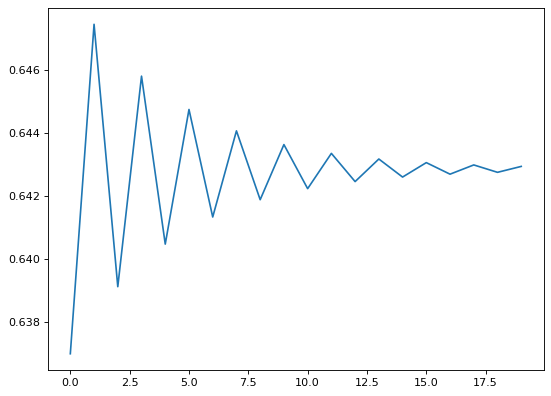

In [18]:
def log_plot(x, r, n = 20): 
    y = []
    for i in range(n):
        y.append(logistic_map_recursivo(x, r, i+1))
    plt.figure(figsize = (8,6), dpi = 80)
    plt.plot(range(n),y)

log_plot(.35,2.8)

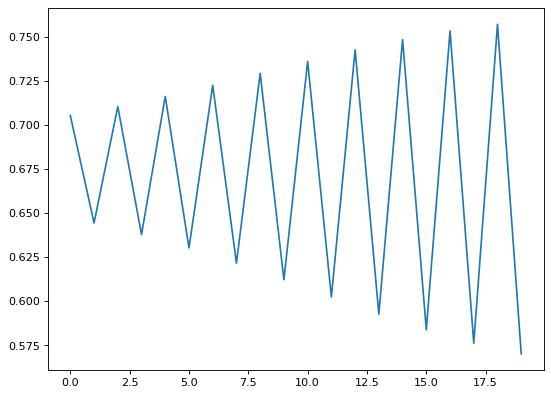

In [19]:
log_plot(.35,3.1)

Se eligieron estos valores porque es un ejemplo de caos, pues aunque los valores de r son muy cercanos y se parten de 
puntos iniciales iguales, las graficas son totalmente distintas


## Diagrama de CobWeb

<div class="alert alert-info">
    
**Ejercicio** Dibuja en una gráfica `logistic_map`, como ejes usa $N_{n+1}$ y $N_n$, además agrega la línea $y = x$ en la misma gráfica. ¿Qué observas para los distintos valores de $r$? Grafícala junto a la gráfica anterior.
</div>

In [20]:
def CobWeb (g,x, r, n=20):
    X = [x, x]
    Y = [x]
    for i in range(1,n,2):
        aux = g(X[i], r)
        Y.append(aux)
        X.append(aux)
        Y.append(aux)
        X.append(aux)
    X.pop()
    #Graficamos la funcion inicial y la identidad
    plt.figure(figsize=(10, 8), dpi=80)
    ejeX = np.linspace(0, 1, 1000)
    funcion = []
    for i in ejeX:
        funcion.append(g(i,r))
    plt.plot(ejeX, ejeX)
    plt.plot(ejeX, funcion)
    #Graficamos los puntos
    plt.plot(X, Y, c='r', alpha=0.7)

<div class="alert alert-info">
    
**Ejercicio** Agrega los segmentos de línea $(x_0, x_0), (x_0. f(x_0)), (f(x_0), f(x_0)), (f(x_0), f(f(x_0))), \ldots$
</div>

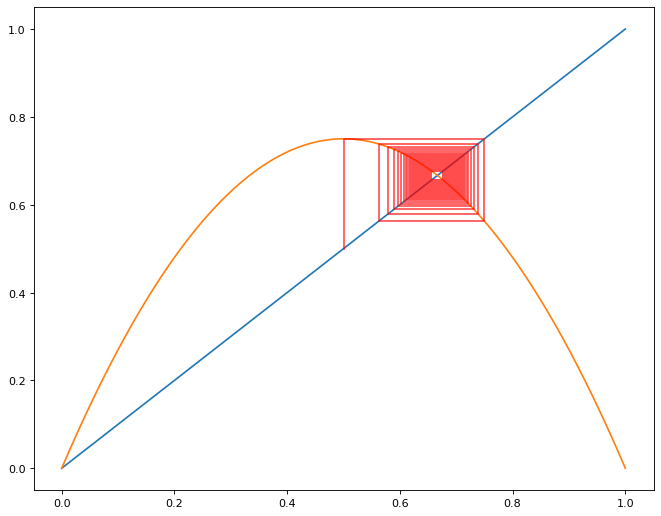

In [21]:
 CobWeb(logistic_map, x=.5, r=3, n=1000)

In [22]:
interact(CobWeb ,g=fixed(logistic_map),  x=(.0001,1,.1), r=(0,4,.1), n=fixed(500))

interactive(children=(FloatSlider(value=0.4001, description='x', max=1.0, min=0.0001), FloatSlider(value=2.0, …

<function __main__.CobWeb(g, x, r, n=20)>

## Diagrama de Bifurcación

<div class="alert alert-info">
    
**Ejercicio** ¿Qué hace el siguiente código? Modificalo para que use nuestras funciones.
</div>

In [23]:
import math
from PIL import Image
imgx = 1000
imgy = 500
image = Image.new("RGB", (imgx, imgy))

xa = 1
xb = 4
maxit = 5000

for i in range(imgx):
    r = xa + (xb - xa) * float(i) / (imgx - 1)
    x = 0.5
    for j in range(maxit):
        x = r * x * (1 - x)
        if j > maxit / 2:
            image.putpixel((i, int(x * imgy)), (255, 255, 255))

image.save("bifurcacion.png", "PNG")

<img src="./bifurcacion.png"/>

### Pasos para producir el diagrama de bifurcación

1. Escoje un valor inicial para `r`
2. Escoje un valor al azar para `x` en `[0,1]`
3. Calcula la órbita de `x` bajo el `g` (en el caso anterior el mapeo logístico)
4. Ignora las primeras `n` iteraciones y dibuja el valor de `x` para la iteración `n+1`
5. Incrementa `r` y repite hasta `r` final.

<div class="alert alert-info">
**Ejercicio** Repite todo lo anterior para el mapeo

$$
f(x,\mu) = 1 - \mu x^2
$$

¿Qué diferencia observas? ¿Cuáles son sus puntos fijos? ¿Cuáles son los valores interesantes?
</div>

In [24]:
import sympy

In [25]:
miu = symbols('mu')
x = symbols('x')

In [26]:
solve(Eq(x,1-miu*x**2),x)

[(sqrt(4*mu + 1) - 1)/(2*mu), -(sqrt(4*mu + 1) + 1)/(2*mu)]

In [27]:
abs(diff(1-miu*x**2,x)).replace(x, (sympy.sqrt(4*miu+1)-1)/(2*miu))

2*Abs(sqrt(4*mu + 1)/2 - 1/2)

In [28]:
solve(abs(diff(1-miu*x**2,x)).replace(x, (sympy.sqrt(4*miu+1)-1)/(2*miu)) <1)

(-1/4 < mu) & (mu < 3/4)

Diagraba CobWeb

In [29]:
def logistic_map(x,r):
    return 1-r*x**2

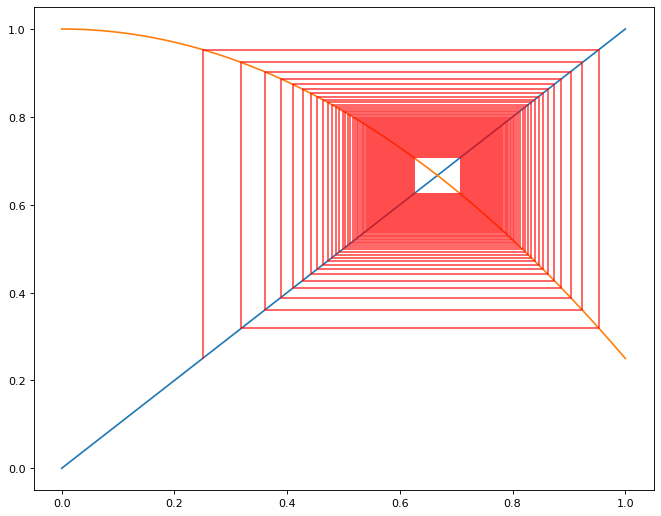

In [30]:
 CobWeb(logistic_map, x=.25, r=.75, n=1000)

Y el diagrama de Bifurcación:

In [31]:
def new(x,w):
    return 1-w*x**2

C:\Users\ianca\AppData\Local\Temp/ipykernel_5308/2059959076.py:2: RuntimeWarning: overflow encountered in square
  return 1-w*x**2
C:\Users\ianca\AppData\Local\Temp/ipykernel_5308/2059959076.py:2: RuntimeWarning: overflow encountered in multiply
  return 1-w*x**2


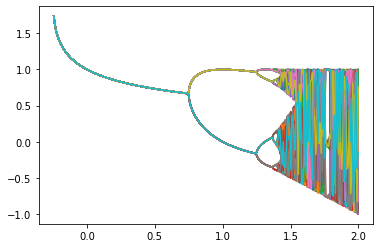

In [32]:
w_random= np.linspace(-4,4,1000)
x = 1e-5 * np.ones(1000)
for i in range(1000):
    x = new(x,w_random)
    if i >= (900):
        plt.plot(w_random, x)

# 3- Fractales

<div class="alert alert-info">
    
**Ejercicio** Genera de la misma manera el [Triángulo de Sierpinski](http://en.wikipedia.org/wiki/Sierpinski_triangle)
</div>

In [33]:
class Triangulo_sierpinsky:
    def __init__ (self, lado=3, iteraciones=4):
        self.lado = lado
        self.iteraciones = iteraciones
        self.x_vertice1 = 0
        self.y_vertice1 = 0
        self.x_vertice2 = lado
        self.y_vertice2 = 0
        self.x_vertice3 = lado * np.cos(np.pi / 3.0)
        self.y_vertice3 = lado * np.sin(np.pi / 3.0)
        plt.figure(dpi=1200)
        self.generar(self.iteraciones, self.x_vertice1, self.y_vertice1,self.x_vertice2, self.y_vertice2, self.x_vertice3, self.y_vertice3)       
        plt.savefig('Sierpinski triangle.png')
        
    def generar(self, iteracion, x1,y1,x2,y2,x3,y3):
        if iteracion>0:
            self.plot(x1,y1,x2,y2,x3,y3)
            self.generar(iteracion-1, x1, y1, (x1+x2)/2, (y1+y2)/2, (x1+x3)/2, (y1+y3)/2)
            self.generar(iteracion-1, (x1+x2)/2, (y1+y2)/2, x2, y2, (x2+x3)/2, (y2+y3)/2)
            self.generar(iteracion-1, (x1+x3)/2, (y1+y3)/2, (x3+x2)/2, (y3+y2)/2, x3, y3) 
            
    def plot(self, x1, y1, x2, y2, x3, y3):
        plot([x1,x2,x3,x1],[y1,y2,y3,y1],lw=1.0)

In [34]:
t = Triangulo_sierpinsky(lado=1, iteraciones=8)

TypeError: 'NoneType' object is not iterable

<Figure size 7200x4800 with 0 Axes>